# Imports and Libraries :

In [1]:
import warnings
warnings.filterwarnings("ignore")
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare some functions to use :


##### 1- Function to get the all values of each column

In [2]:
def GetValuesCounts(data):
    import pandas as pd
    columns = [col for col in data.columns ]

    for col in columns:
        print(data[col].value_counts(),"\n")

##### 2- Function to get the object (string) Features

In [3]:
def GetObjectFeatures(data) :
    object_columns = [col for col in data.columns if data[col].dtype == 'object']

    for col in object_columns :
        print(data[col].value_counts(),"\n")

##### 3- Function to "Plot Box Plot" and it works only for the datatype of integer and float columns .

In [4]:
def PBP (data):
    for col in data.select_dtypes(include=['int', 'float']).columns:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title(f'Boxplot of {col}')
        bp=data.boxplot(column=col)
        plt.show()
        plt.close(fig)

##### 4- Function to Plot Pair Plot with different Hues

In [5]:
def TribleP(data):
    columns = [col for col in data.columns]
    custom_palette = sns.color_palette("coolwarm", 6)

    for col in columns:
        if data[col].value_counts().count() <= 6:
            sns.pairplot(data, hue=col, palette=custom_palette)
            plt.show()
        else:
            continue

##### 5- Function to Plot Distribution Plot

In [6]:
def PDP(data):
    columns = [col for col in data.columns]
    colors = sns.color_palette("coolwarm", len(columns))

    for i, col in enumerate(data.select_dtypes(include=['int', 'float']).columns):
        if data[col].value_counts().count() <= 10000:
            sns.histplot(data[col], kde=True, bins=15, color=colors[i % len(colors)])
            plt.title(f'Distribution of {col}')
            plt.show()

##### 6- Function to Plot Pie chart if the feature has values less than or equal 10

In [7]:
def PlotPie(data):
    custom_palette = "coolwarm"
    sns.set_palette(custom_palette)


    plt.figure(figsize=(8, 6))

    columns = [col for col in data.columns]

    for col in columns:
        if data[col].value_counts().count() <= 10:
            # Plot pie chart
            plt.figure(figsize=(8,6))
            data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f"Distribution of {col}")
            plt.ylabel("")
            plt.axis('equal')
            plt.show()
            print("\n\n\n")

# Reading Data :

In [64]:
data = pd.read_excel(r"/content/heart_data.xlsx")
copiedData = copy.deepcopy(data)

In [65]:
print(data.shape)

(237630, 35)


In [66]:
class_counts = data['HadHeartAttack'].value_counts()
print(class_counts)

HadHeartAttack
0    224429
1     13201
Name: count, dtype: int64


In [10]:
# Filter the rows where 'HadHeartAttack' is 0
zero_rows = data[data['HadHeartAttack'] == 0]

# Drop the first 200,000 rows with 0 in 'HadHeartAttack'
rows_to_drop = zero_rows.index[:200000]
data = data.drop(rows_to_drop)

# Check the new shape of the data to confirm
print(f"New shape of the dataset: {data.shape}")


New shape of the dataset: (37630, 35)


# EDA & Statistical Analysis :

In [11]:
data.head(7)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
16,17,Alabama,Male,Fair,Age 75 to 79,1.75,74.839996,24.370001,1,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,1,1,1,"No, did not receive any tetanus shot in the pa...",0,1
24,25,Alabama,Male,Good,Age 70 to 74,1.73,86.180000,28.889999,1,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"Yes, received tetanus shot but not sure what type",0,1
32,33,Alabama,Male,Poor,Age 55 to 59,1.85,68.040001,19.790001,1,0,...,Use them some days,1,"White only, Non-Hispanic",0,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
36,37,Alabama,Male,Good,Age 60 to 64,1.88,115.669998,32.740002,1,0,...,Use them some days,1,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
60,61,Alabama,Female,Fair,Age 70 to 74,1.63,73.480003,27.809999,1,1,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,1,1,1,"Yes, received tetanus shot but not sure what type",0,0
67,68,Alaska,Male,Good,Age 80 or older,1.80,74.839996,23.010000,1,0,...,Never used e-cigarettes in my entire life,0,"Other race only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
126,127,Alaska,Female,Poor,Age 60 to 64,1.60,79.379997,31.000000,1,0,...,Not at all (right now),1,"White only, Non-Hispanic",0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,0


In [12]:
data.tail(7)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
237623,237624,Puerto Rico,Female,Good,Age 55 to 59,1.57,68.040001,27.440001,0,1,...,Not at all (right now),0,Hispanic,1,0,0,0,"Yes, received Tdap",0,0
237624,237625,Puerto Rico,Female,Poor,Age 70 to 74,1.52,45.810001,19.730000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"Yes, received tetanus shot but not sure what type",0,0
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1
237629,237630,Puerto Rico,Female,Good,Age 30 to 34,1.60,83.010002,32.419998,0,0,...,Never used e-cigarettes in my entire life,1,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37630 entries, 16 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  37630 non-null  int64  
 1   State                      37630 non-null  object 
 2   Sex                        37630 non-null  object 
 3   GeneralHealth              37630 non-null  object 
 4   AgeCategory                37630 non-null  object 
 5   HeightInMeters             37630 non-null  float64
 6   WeightInKilograms          37630 non-null  float64
 7   BMI                        37630 non-null  float64
 8   HadHeartAttack             37630 non-null  int64  
 9   HadAngina                  37630 non-null  int64  
 10  HadStroke                  37630 non-null  int64  
 11  HadAsthma                  37630 non-null  int64  
 12  HadSkinCancer              37630 non-null  int64  
 13  HadCOPD                    37630 non-null  int64 

In [14]:
data.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [15]:
data.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,...,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000,37630.000000
mean,187167.310231,1.704706,84.716403,29.064124,0.350811,0.198432,0.086181,0.166755,0.092905,0.121685,...,0.229099,0.057348,0.101701,0.522323,0.489663,0.349562,0.530853,0.462052,0.036354,0.290593
std,65476.163890,0.107390,21.539018,6.613220,0.477230,0.398825,0.280635,0.372762,0.290303,0.326926,...,0.420259,0.232509,0.302258,0.499508,0.499900,0.476838,0.499054,0.498564,0.187172,0.454042
min,17.000000,0.910000,30.389999,12.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167703.000000,1.630000,69.400002,24.567500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,218815.500000,1.700000,81.650002,28.040001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,228222.750000,1.780000,96.160004,32.279999,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237630.000000,2.410000,249.479996,95.660004,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data.shape

(37630, 35)

In [17]:
NumiricalColumns=['HeightInMeters', 'WeightInKilograms', 'BMI','HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis','DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands','ChestScan','HighRiskLastYear', 'CovidPos','AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver']
for col in NumiricalColumns :
    print("Variance for",col,"column :",data[col].var())

Variance for HeightInMeters column : 0.011532634078209755
Variance for WeightInKilograms column : 463.9293008323372
Variance for BMI column : 43.73467327518551
Variance for HadHeartAttack column : 0.22774855242047862
Variance for HadAngina column : 0.15906102989752305
Variance for HadStroke column : 0.07875612543403239
Variance for HadAsthma column : 0.1389516281548549
Variance for HadSkinCancer column : 0.08427557276323357
Variance for HadCOPD column : 0.10688046937301887
Variance for HadDepressiveDisorder column : 0.1734302621535677
Variance for HadKidneyDisease column : 0.0687833968077523
Variance for HadArthritis column : 0.24314518107307848
Variance for DeafOrHardOfHearing column : 0.10536842393167815
Variance for BlindOrVisionDifficulty column : 0.07432894197670571
Variance for DifficultyConcentrating column : 0.11621393934667422
Variance for DifficultyWalking column : 0.17661740838915005
Variance for DifficultyDressingBathing column : 0.05406052025047924
Variance for DifficultyE

In [18]:
for col1 in NumiricalColumns :
    for col2 in NumiricalColumns :
        if (col1==col2):
            continue
        else:
            print("Correlation for",col1,"column with",col2,"column :",data[col].corr(data[col2]))

Correlation for HeightInMeters column with WeightInKilograms column : 0.020299593282606
Correlation for HeightInMeters column with BMI column : 0.0367043324928151
Correlation for HeightInMeters column with HadHeartAttack column : 0.27783301383672604
Correlation for HeightInMeters column with HadAngina column : 0.242692704959486
Correlation for HeightInMeters column with HadStroke column : 0.11293134385564528
Correlation for HeightInMeters column with HadAsthma column : 0.0874602020388227
Correlation for HeightInMeters column with HadSkinCancer column : 0.1626207605870759
Correlation for HeightInMeters column with HadCOPD column : 0.18526219927658344
Correlation for HeightInMeters column with HadDepressiveDisorder column : 0.057705703622115585
Correlation for HeightInMeters column with HadKidneyDisease column : 0.15184313885325734
Correlation for HeightInMeters column with HadArthritis column : 0.26373162755037705
Correlation for HeightInMeters column with DeafOrHardOfHearing column : 0

In [19]:
for col in NumiricalColumns:
    print("Skewness for", col, "column:", data[col].skew())

Skewness for HeightInMeters column: -0.025419979642524147
Skewness for WeightInKilograms column: 0.967915737092223
Skewness for BMI column: 1.335167530187927
Skewness for HadHeartAttack column: 0.6252640451775556
Skewness for HadAngina column: 1.5123638656398832
Skewness for HadStroke column: 2.949314488902787
Skewness for HadAsthma column: 1.788070247528747
Skewness for HadSkinCancer column: 2.8047775338075613
Skewness for HadCOPD column: 2.314502549229885
Skewness for HadDepressiveDisorder column: 1.329022362057498
Skewness for HadKidneyDisease column: 3.246477909332787
Skewness for HadArthritis column: 0.3359872748421297
Skewness for DeafOrHardOfHearing column: 2.343330795736313
Skewness for BlindOrVisionDifficulty column: 3.074869249008274
Skewness for DifficultyConcentrating column: 2.1460232007012428
Skewness for DifficultyWalking column: 1.2892784858160682
Skewness for DifficultyDressingBathing column: 3.8078123285599834
Skewness for DifficultyErrands column: 2.6356281570216433


In [20]:
data.isna().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


In [21]:
data.duplicated().sum()

0

In [22]:
GetValuesCounts(data)

PatientID
17        1
225099    1
225083    1
225084    1
225085    1
         ..
212545    1
212546    1
212547    1
212548    1
237630    1
Name: count, Length: 37630, dtype: int64 

State
Washington              9125
Wisconsin               5889
Puerto Rico             3550
West Virginia           2897
Wyoming                 2344
Guam                    1521
Virgin Islands           732
Ohio                     578
Florida                  553
Maryland                 486
Texas                    424
Maine                    413
New York                 407
Minnesota                387
Arizona                  356
Nebraska                 337
Indiana                  334
Kansas                   327
Virginia                 304
Michigan                 299
South Carolina           295
South Dakota             292
Georgia                  273
Iowa                     267
Massachusetts            243
Hawaii                   243
Vermont                  243
Arkansas                 2

In [23]:
GetObjectFeatures(data)

State
Washington              9125
Wisconsin               5889
Puerto Rico             3550
West Virginia           2897
Wyoming                 2344
Guam                    1521
Virgin Islands           732
Ohio                     578
Florida                  553
Maryland                 486
Texas                    424
Maine                    413
New York                 407
Minnesota                387
Arizona                  356
Nebraska                 337
Indiana                  334
Kansas                   327
Virginia                 304
Michigan                 299
South Carolina           295
South Dakota             292
Georgia                  273
Iowa                     267
Massachusetts            243
Hawaii                   243
Vermont                  243
Arkansas                 241
New Hampshire            240
Missouri                 239
Montana                  236
Utah                     224
Connecticut              223
Colorado                 207
Californ

# Key Points from EDA :

#### Data Overview
The dataset comprises a total of 237,630 entries, each representing a patient. It contains 35 columns, which include demographic information, health indicators, and medical history.


#### Data Types
Integer Columns: 23 columns (e.g., HadHeartAttack, HadAngina).
Float Columns: 3 columns (e.g., HeightInMeters, WeightInKilograms, BMI).
Object Columns: 9 columns (e.g., State, Sex, GeneralHealth).
Data Completeness
All columns are complete with 237,630 non-null entries, indicating no missing values in the dataset.

#### Variance Analysis
The variances for key health metrics are as follows:
Height (0.0114)
Weight (456.29)
BMI (42.62)
Various health conditions (e.g., HadHeartAttack: 0.0525, HadStroke: 0.0400).

#### Skewness Analysis
The skewness of key metrics indicates:

Height (0.0313, approximately normal distribution).
Weight (1.0249, positively skewed).
BMI (1.3258, positively skewed).
Health conditions show significant positive skewness for conditions like HadHeartAttack (3.8807) and HadStroke (4.5803), indicating a right-skewed distribution.

#### Summary Statistics
Height:
Mean: 1.70 m
Std Dev: 0.11 m
Range: 0.91 m - 2.41 m
Weight:
Mean: 83.67 kg
Std Dev: 21.36 kg
Range: 28.12 kg - 292.57 kg
BMI:
Mean: 28.69
Std Dev: 6.53
Range: 12.02 - 97.65

# Visualized EDA :

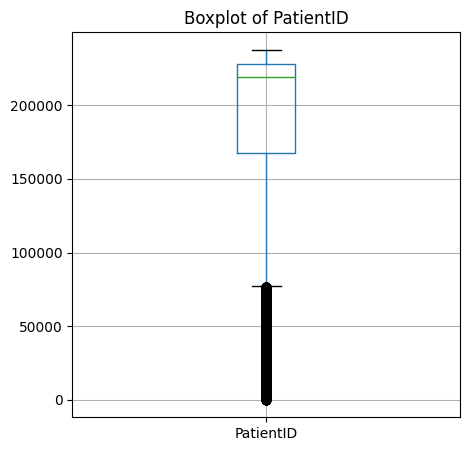

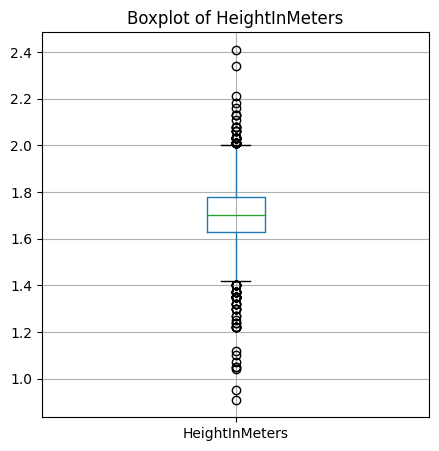

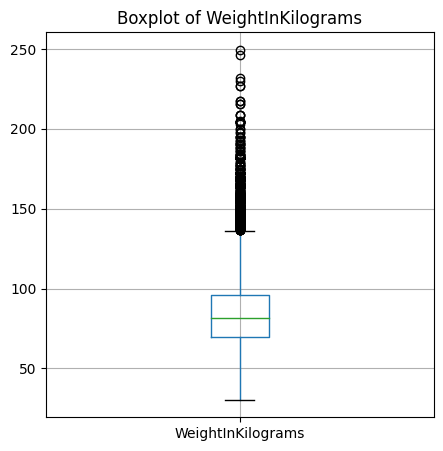

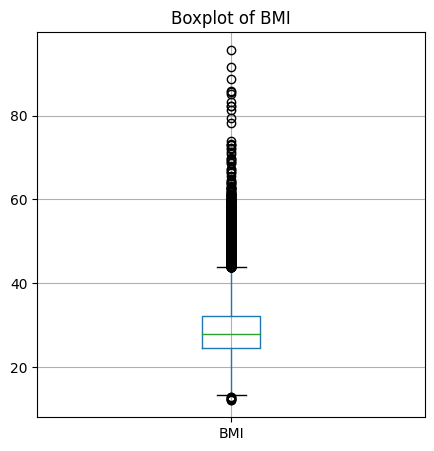

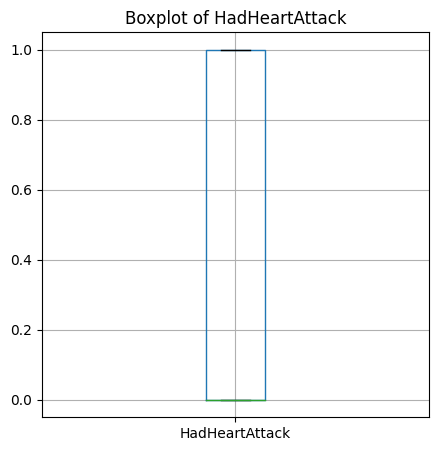

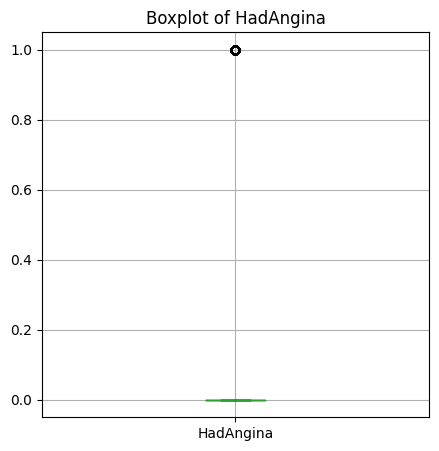

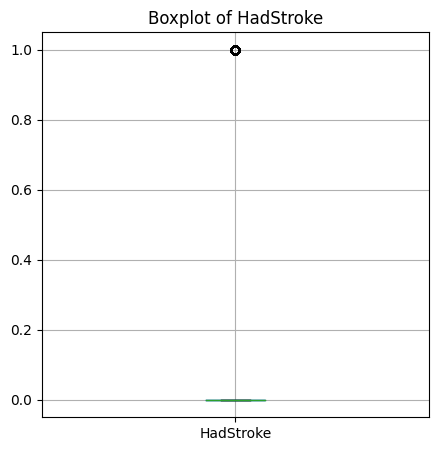

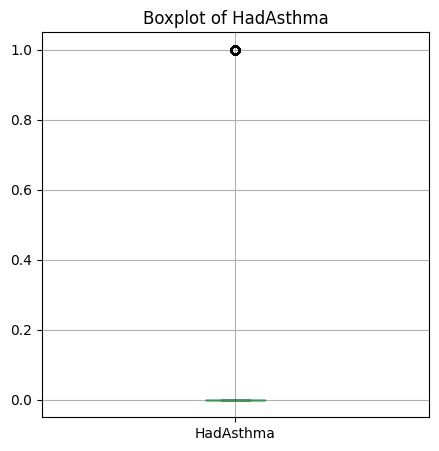

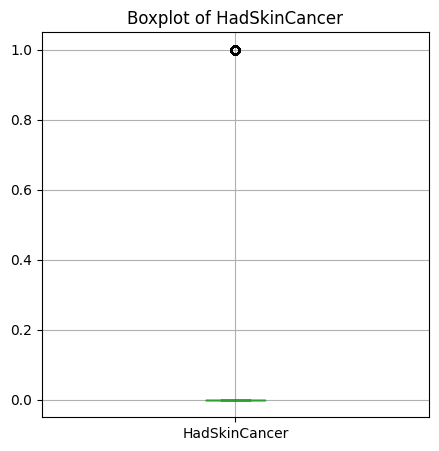

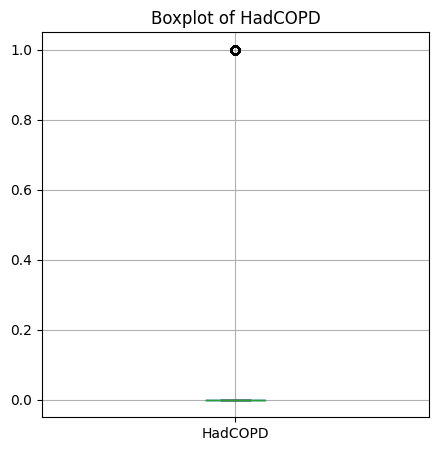

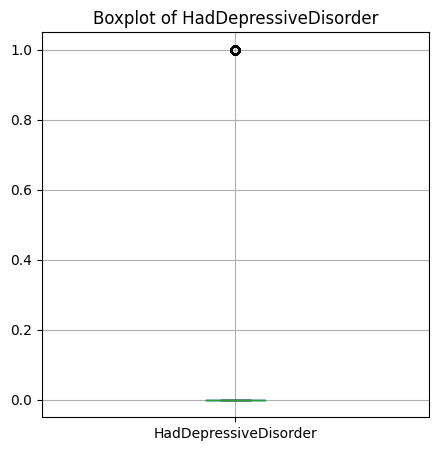

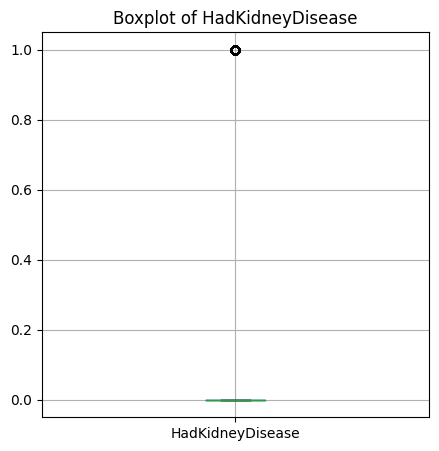

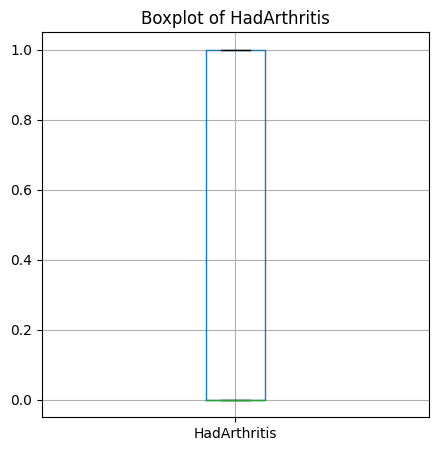

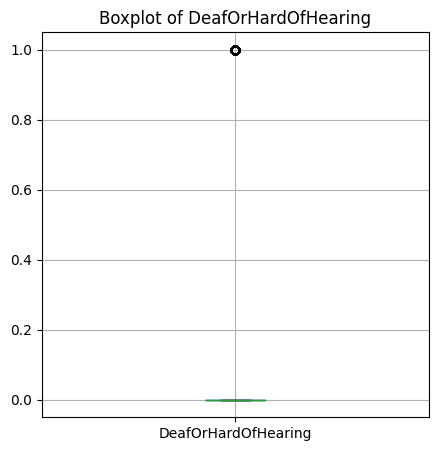

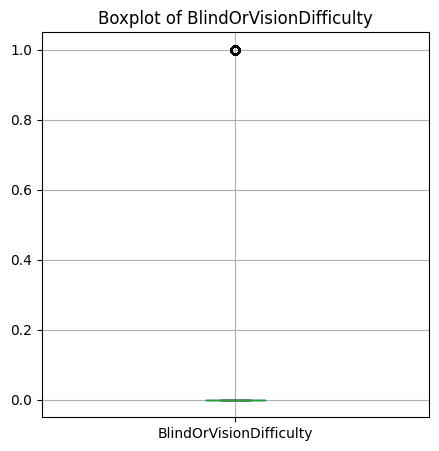

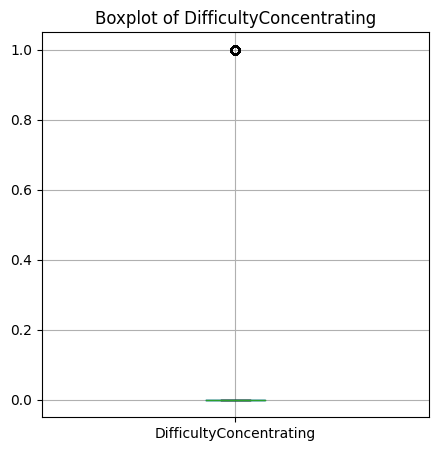

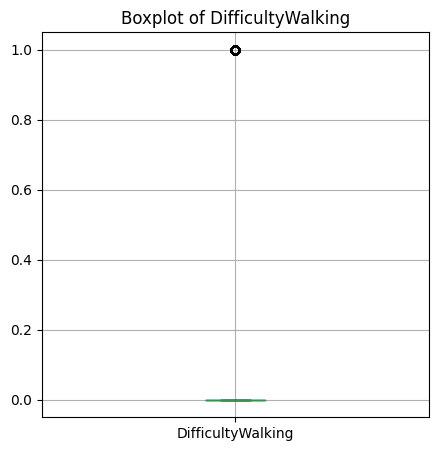

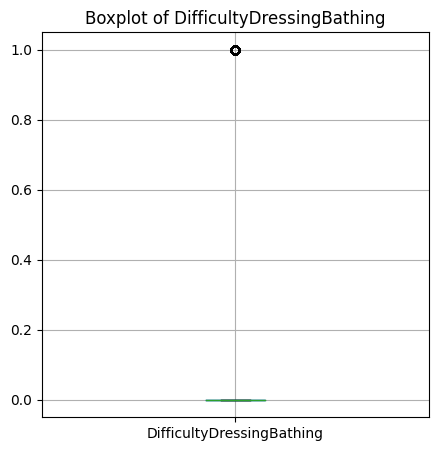

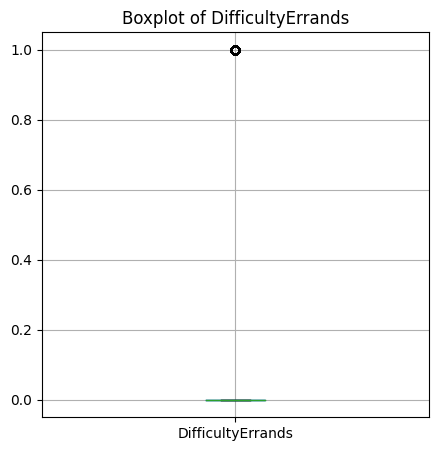

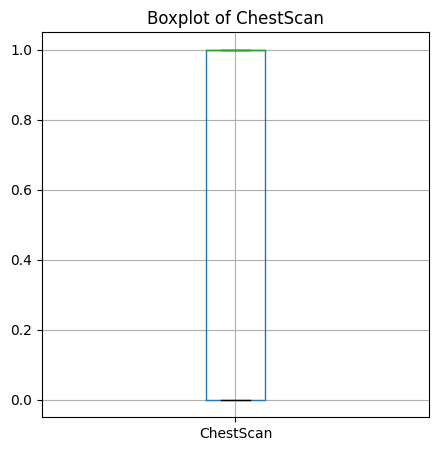

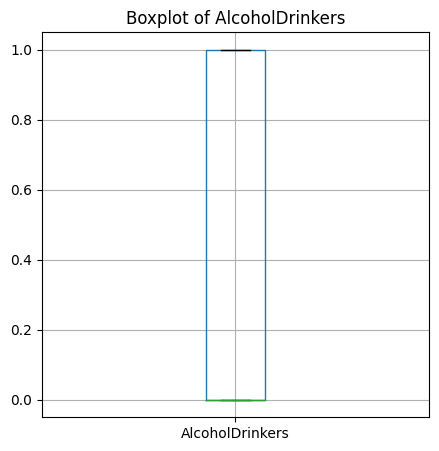

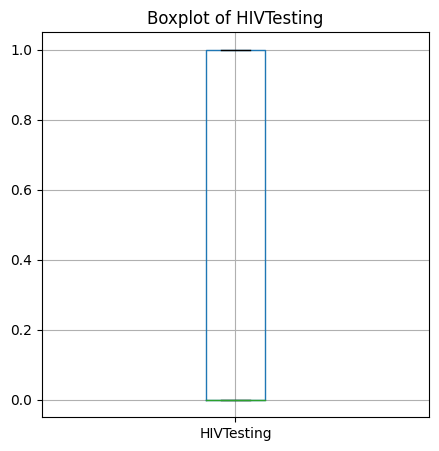

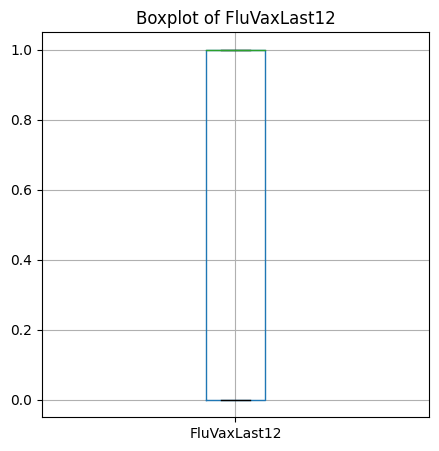

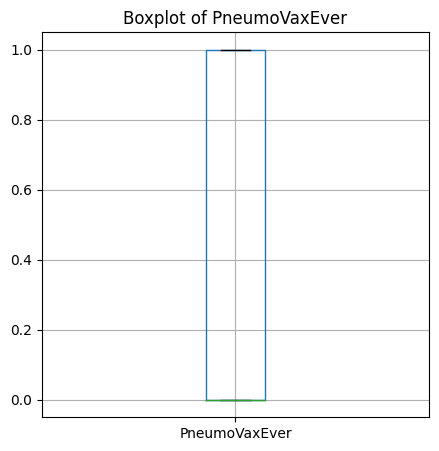

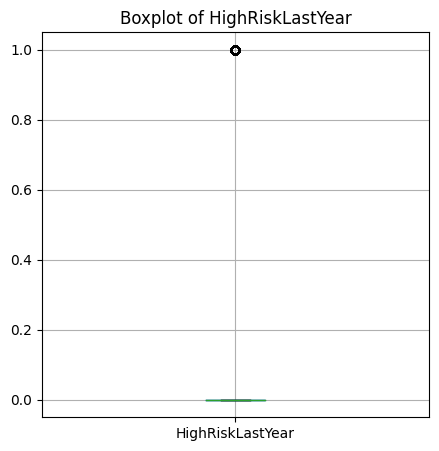

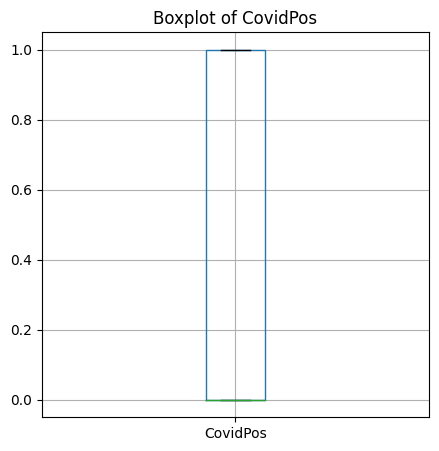

In [24]:
PBP(data)

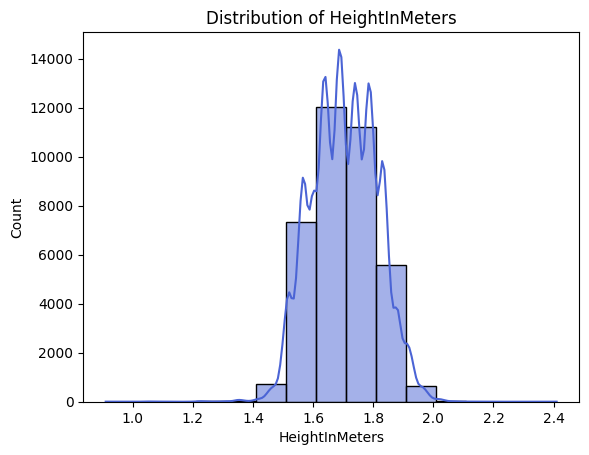

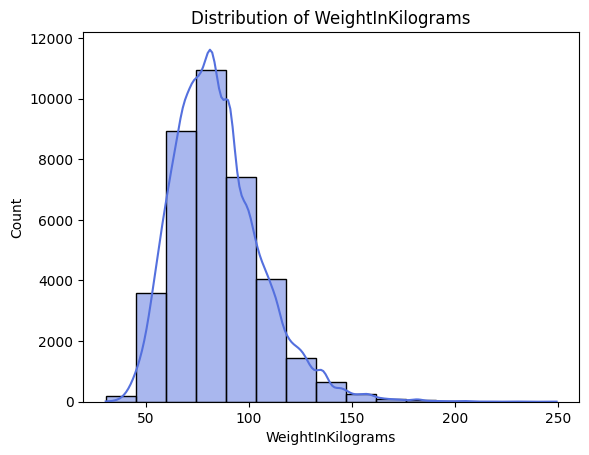

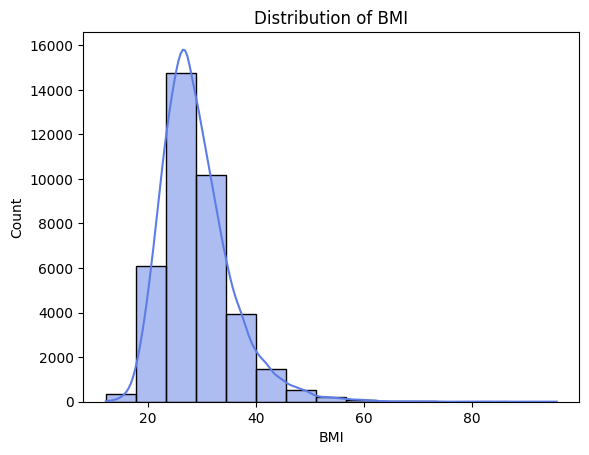

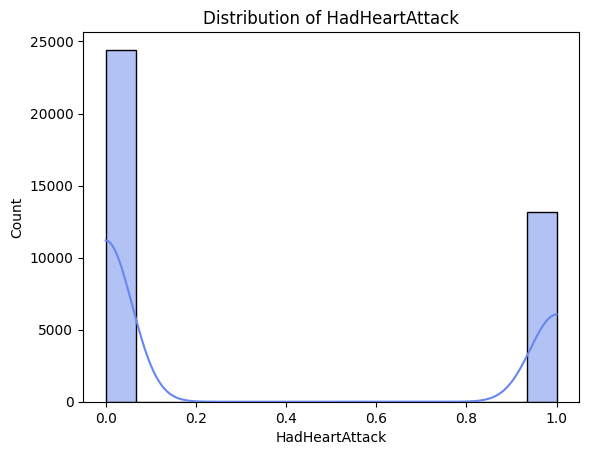

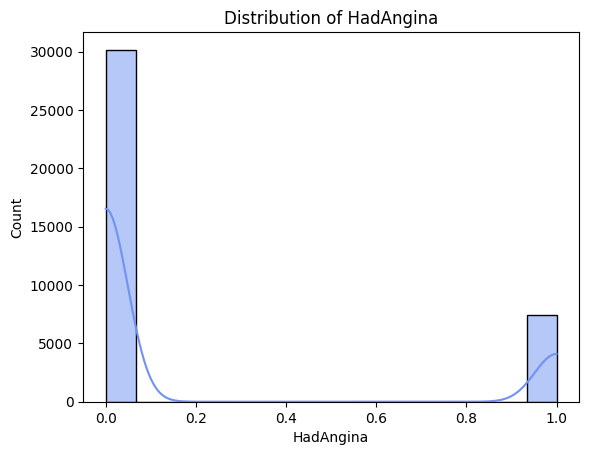

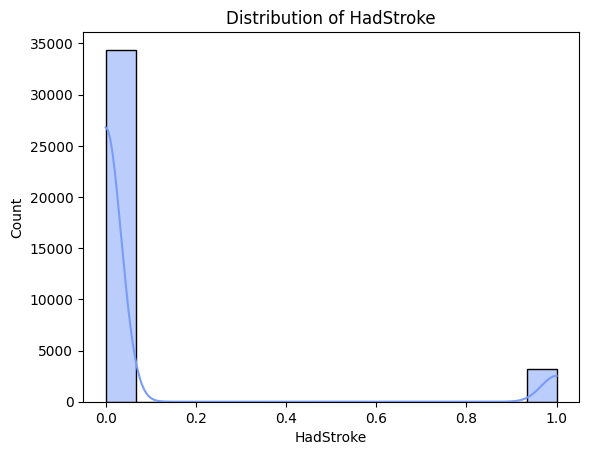

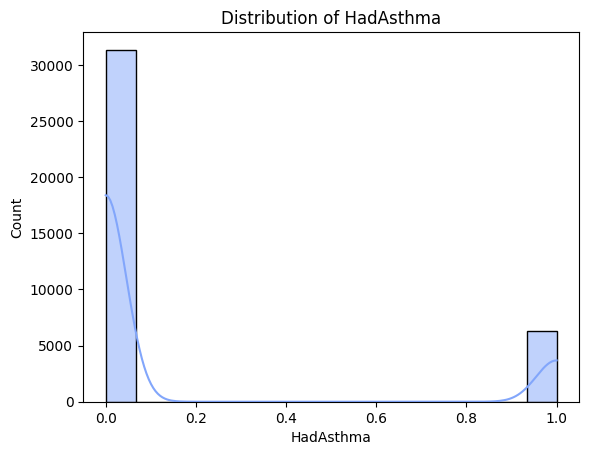

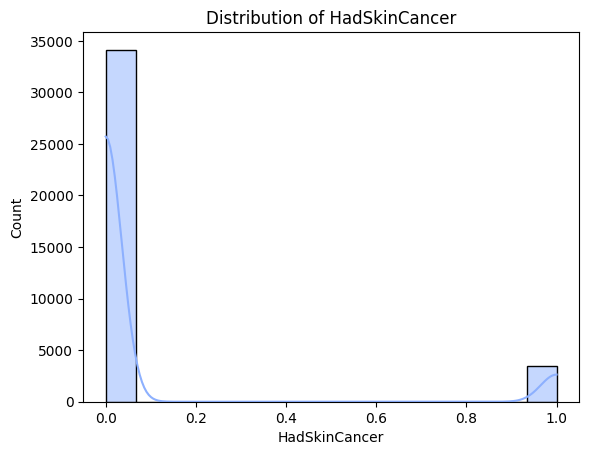

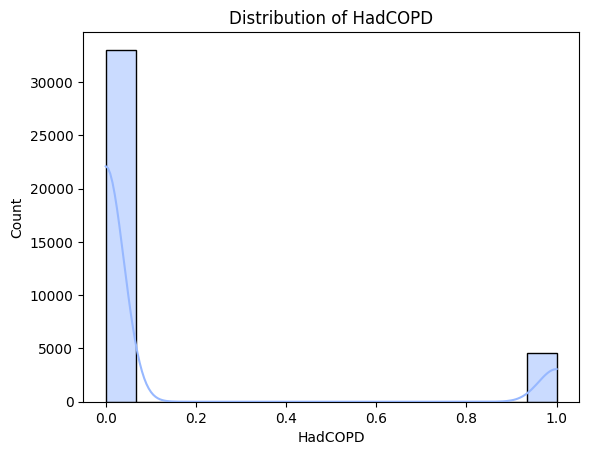

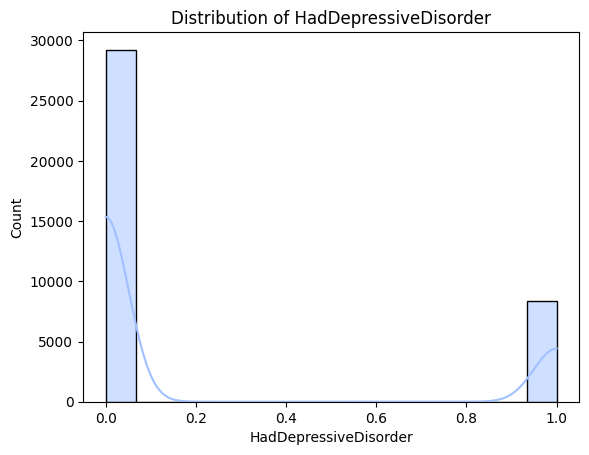

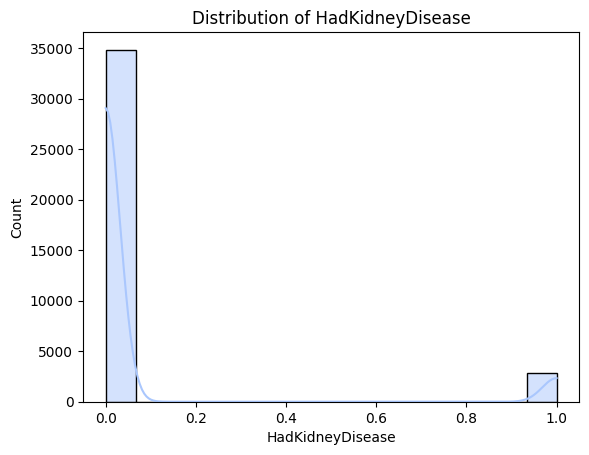

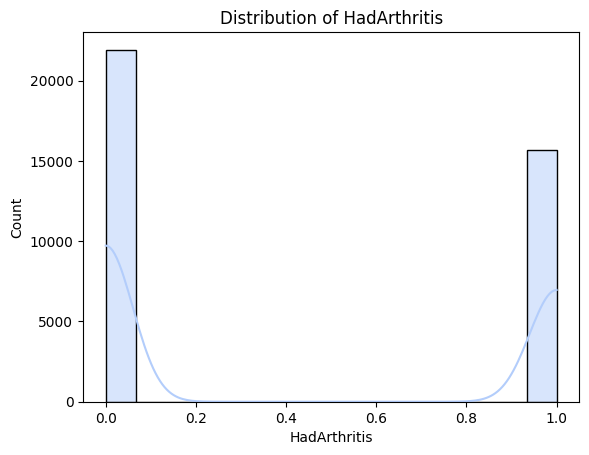

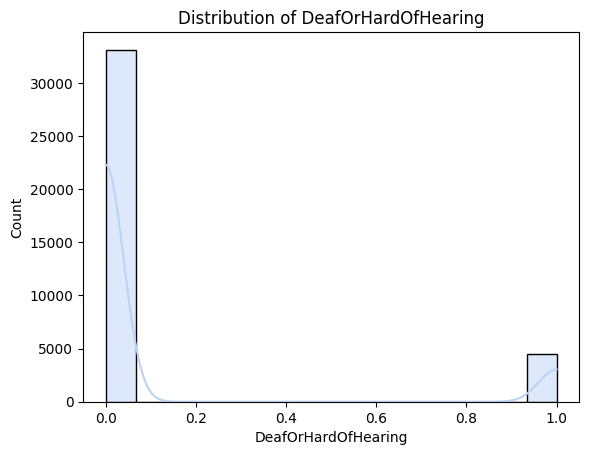

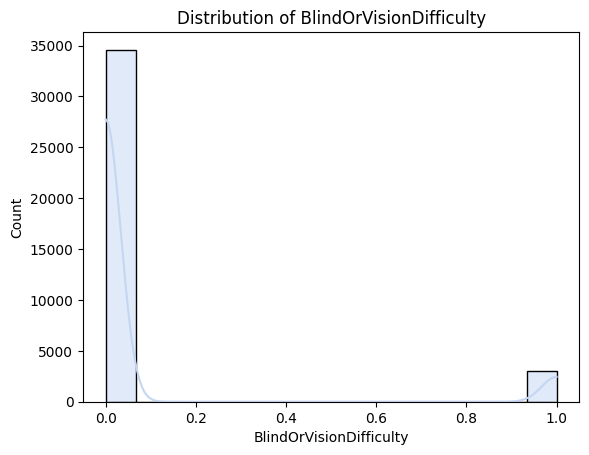

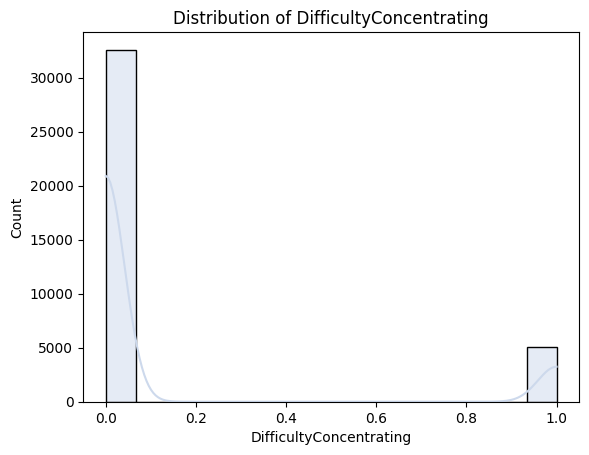

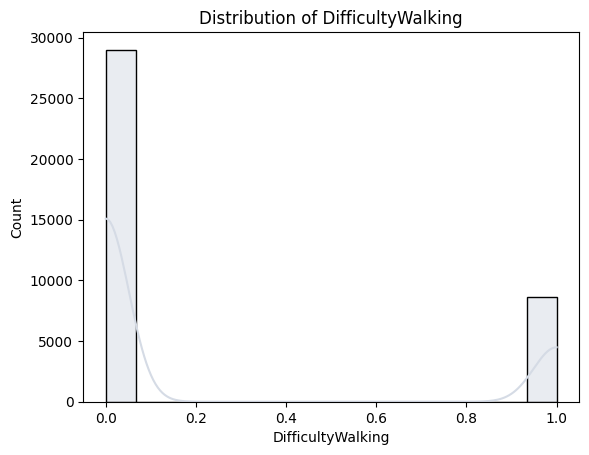

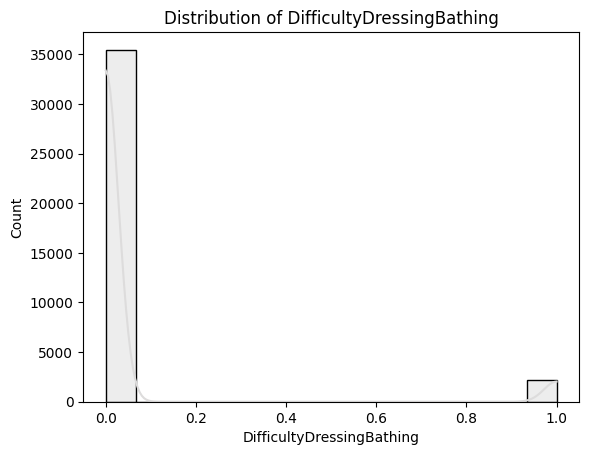

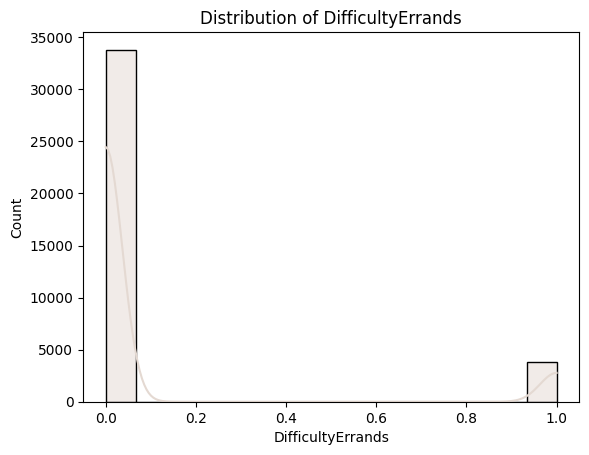

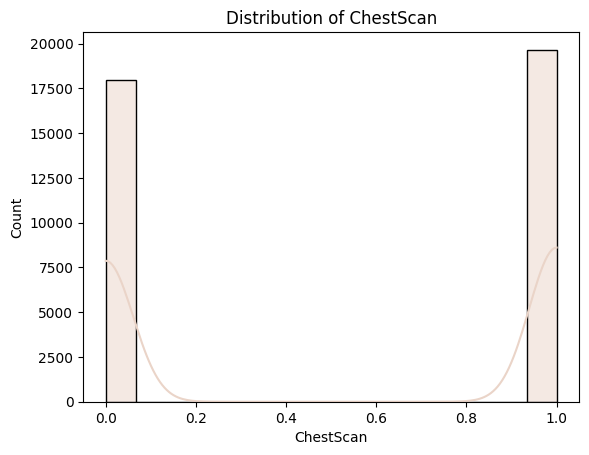

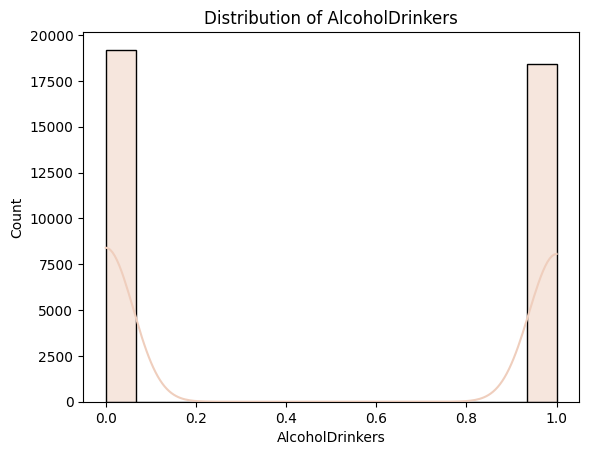

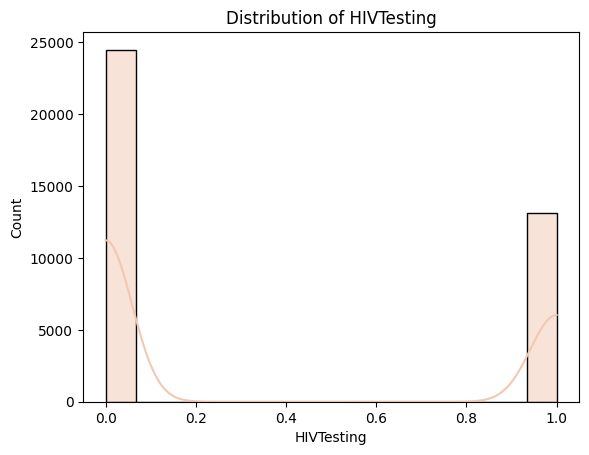

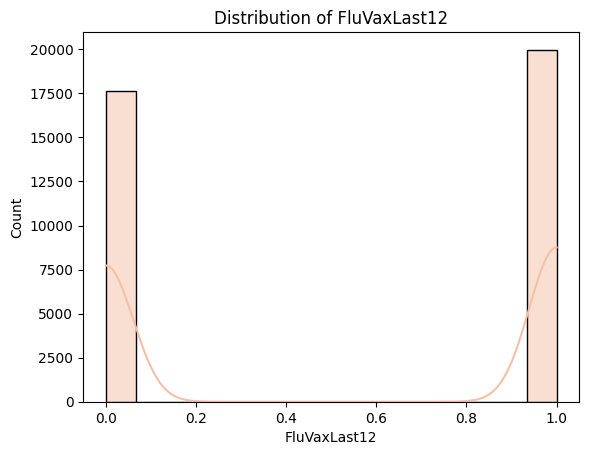

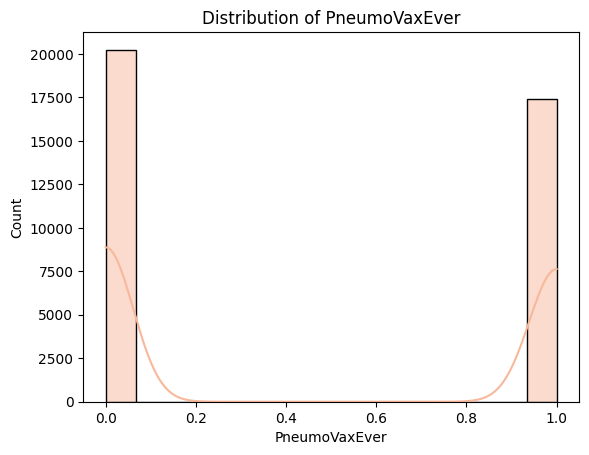

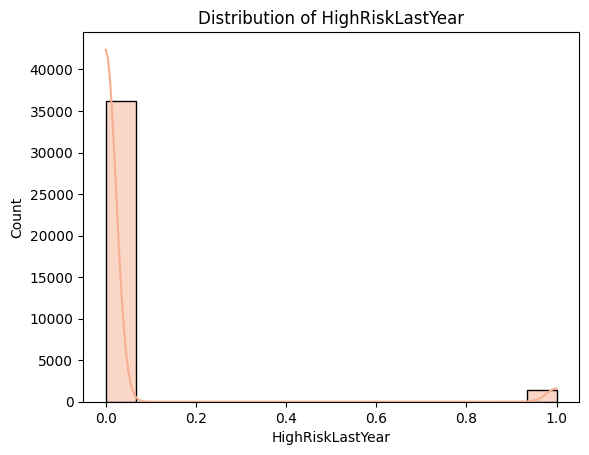

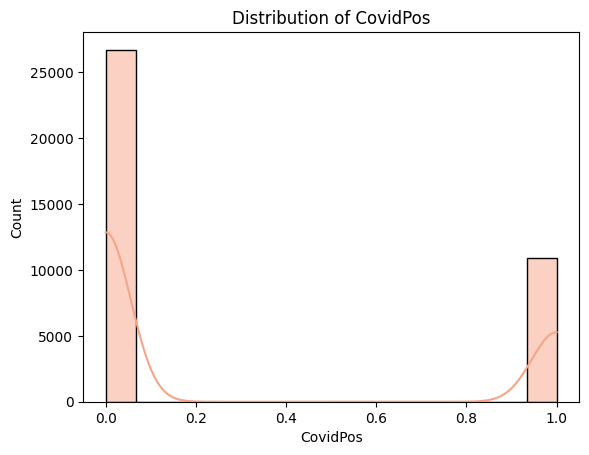

In [25]:
PDP(data)

<Figure size 800x600 with 0 Axes>

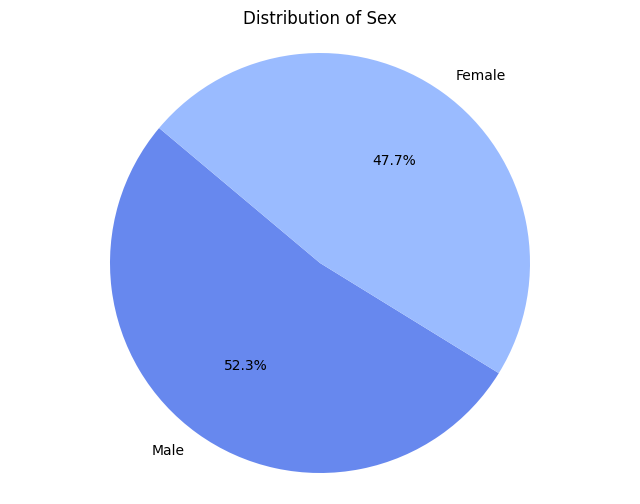

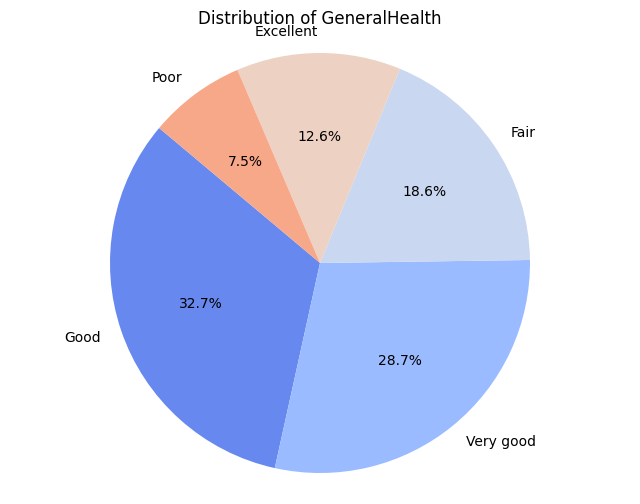

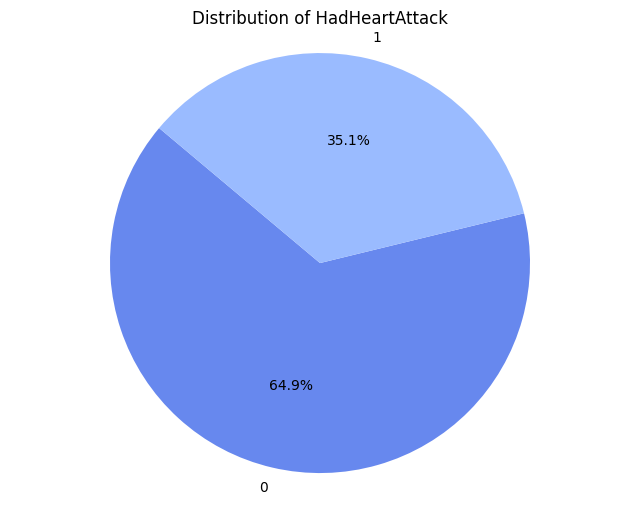

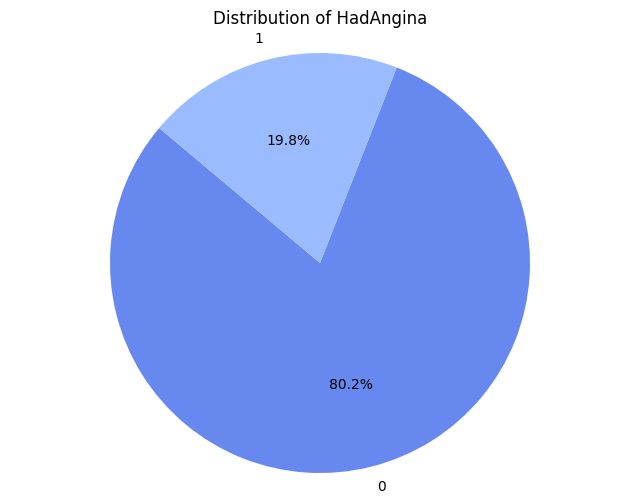

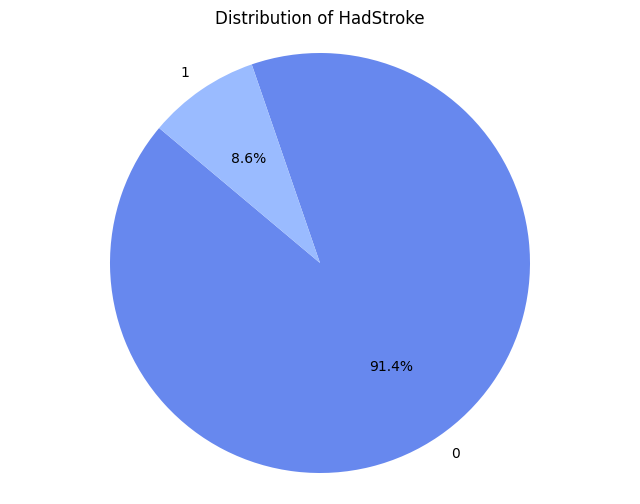

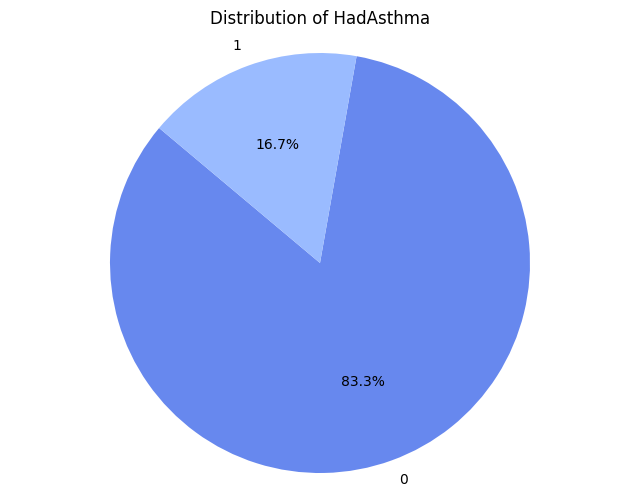

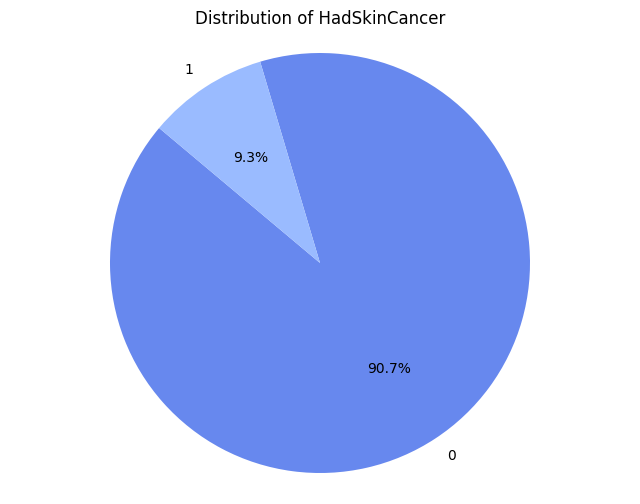

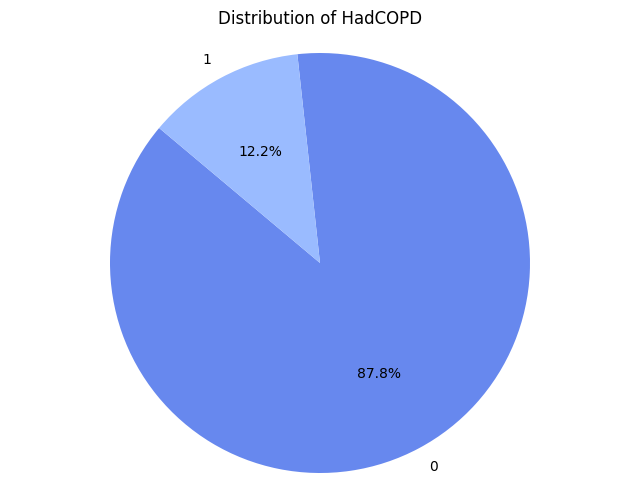

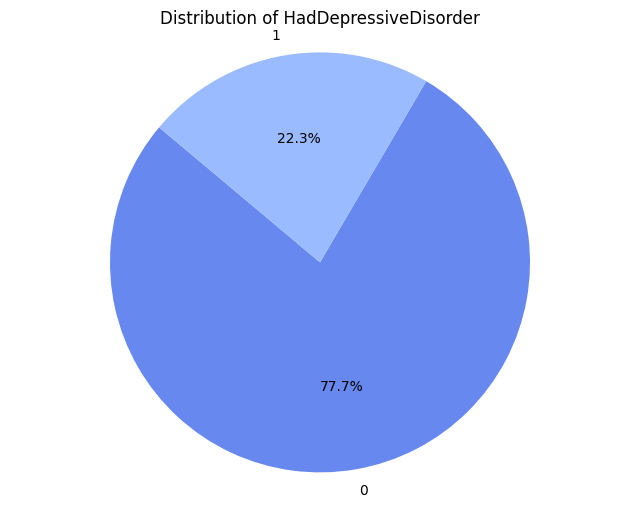

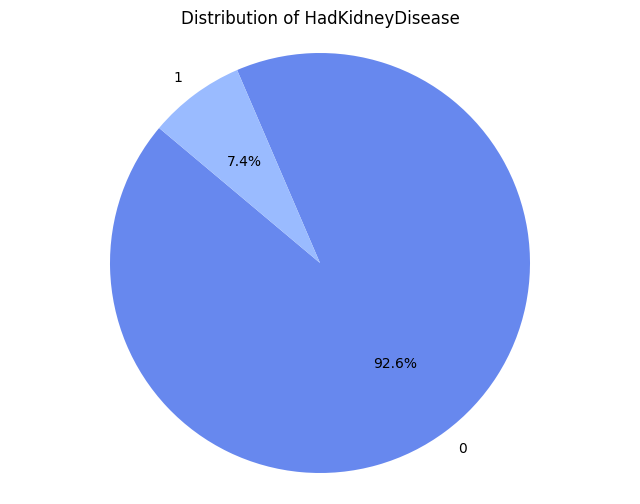

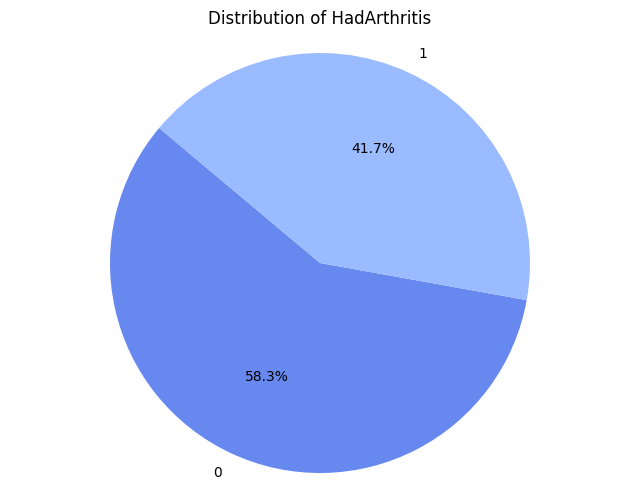

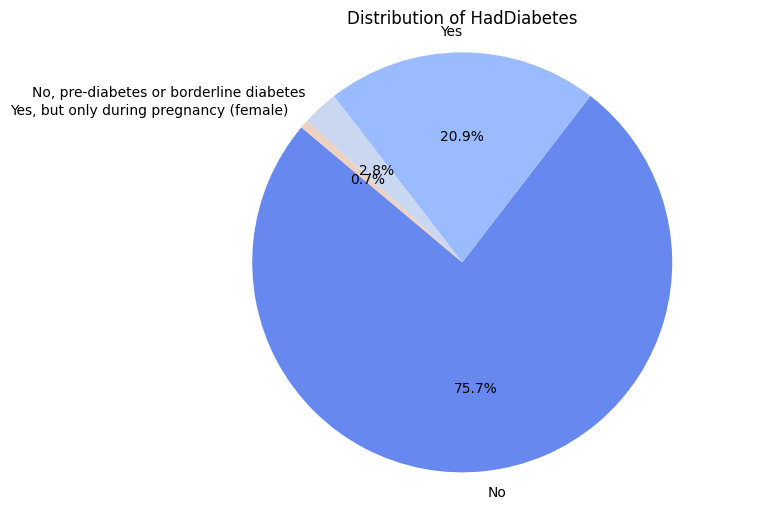

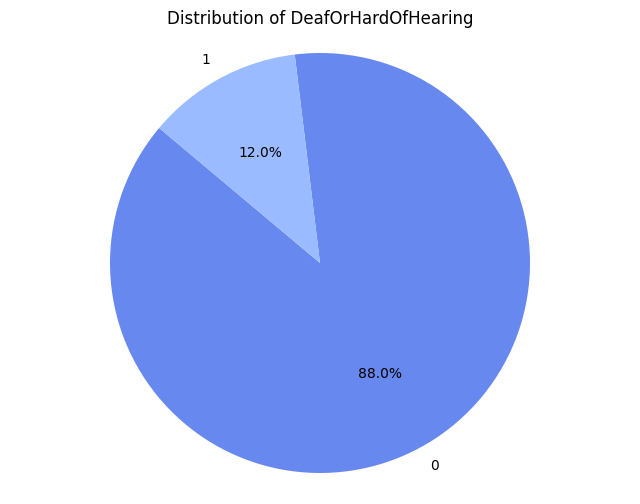

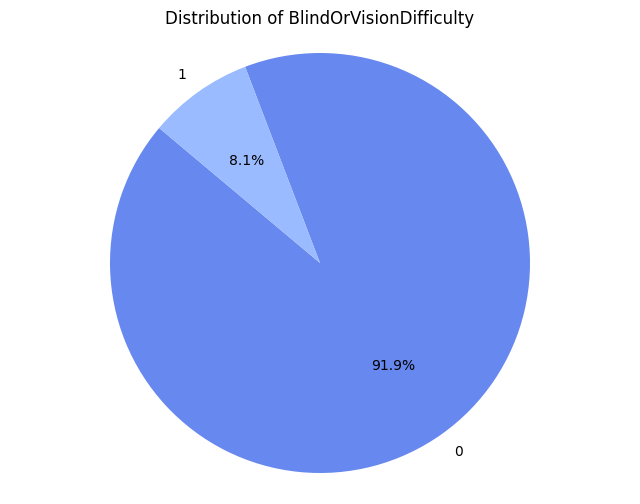

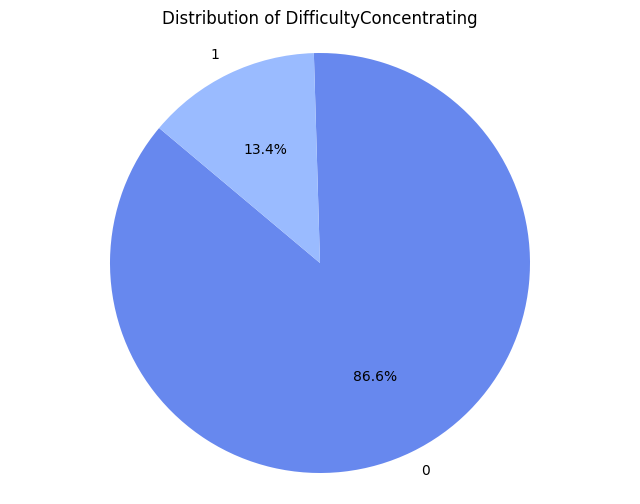

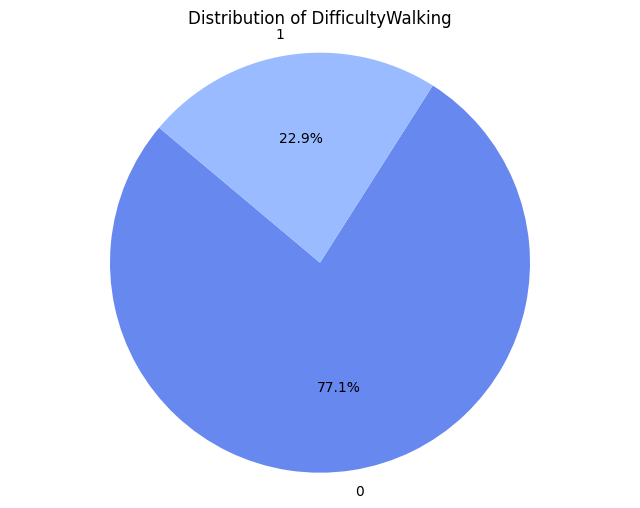

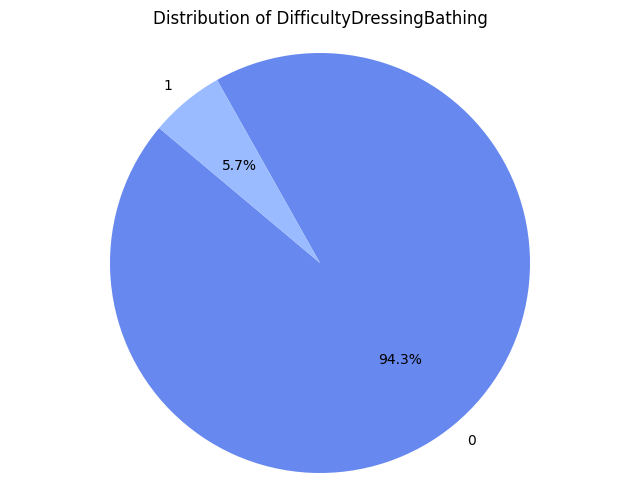

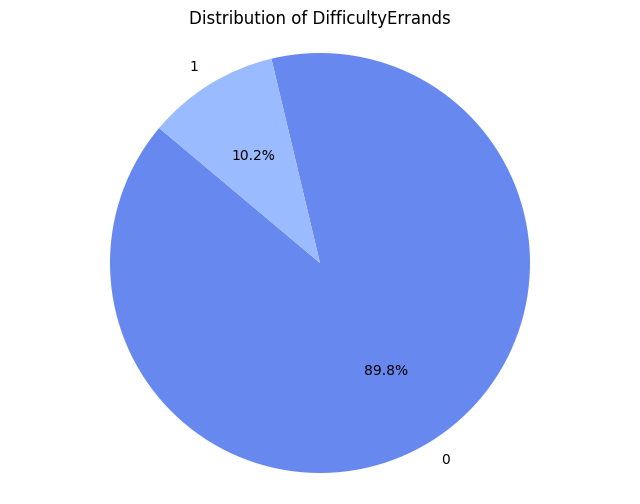

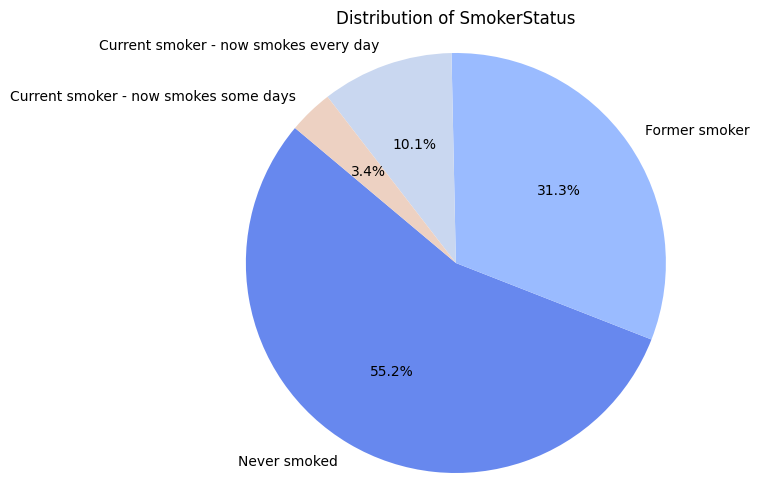

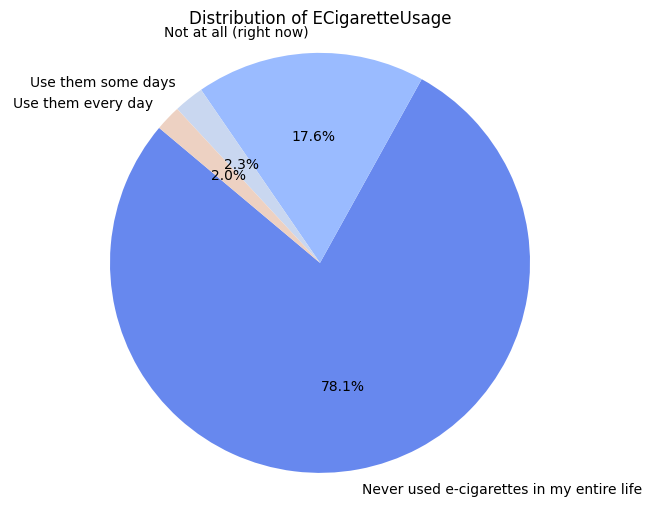

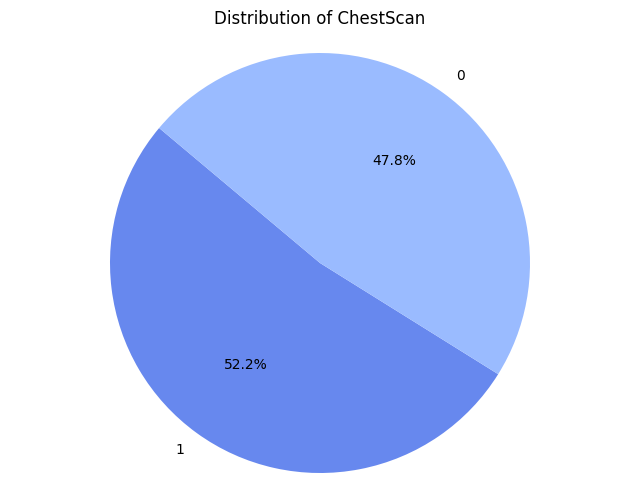

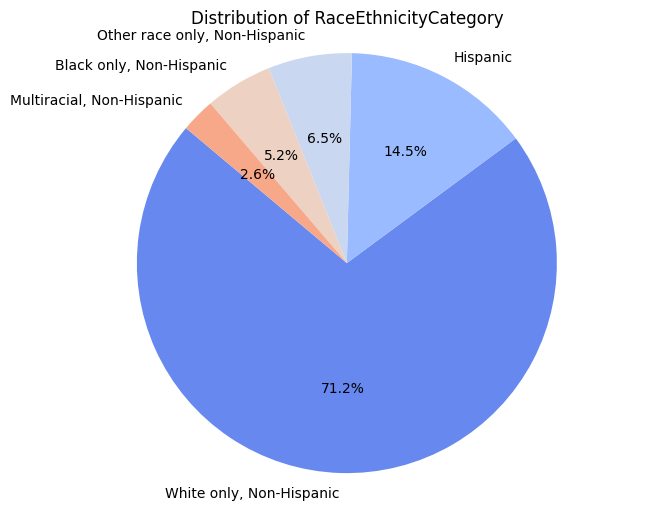

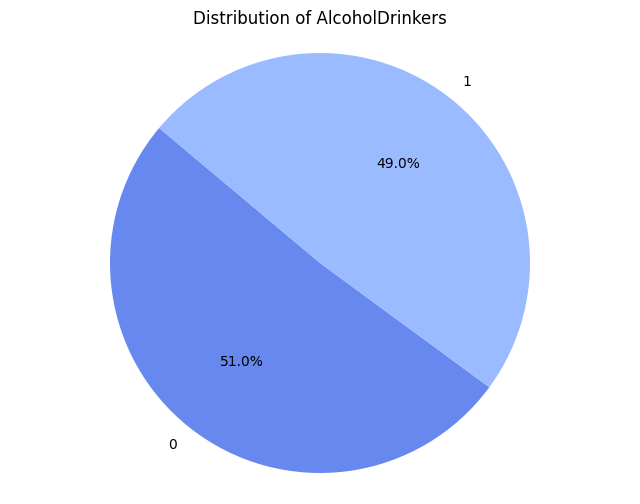

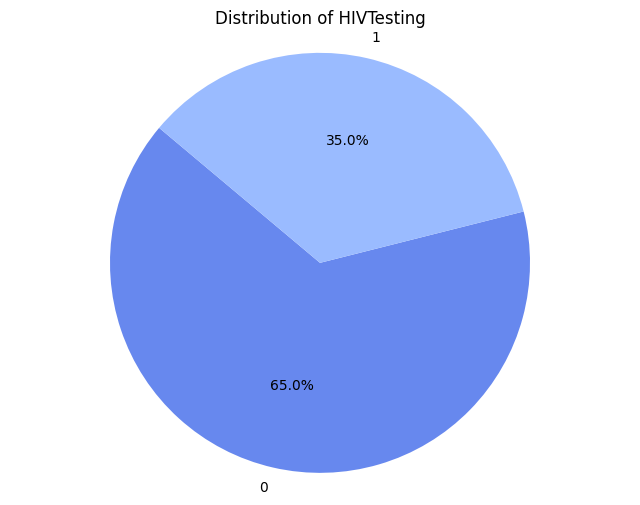

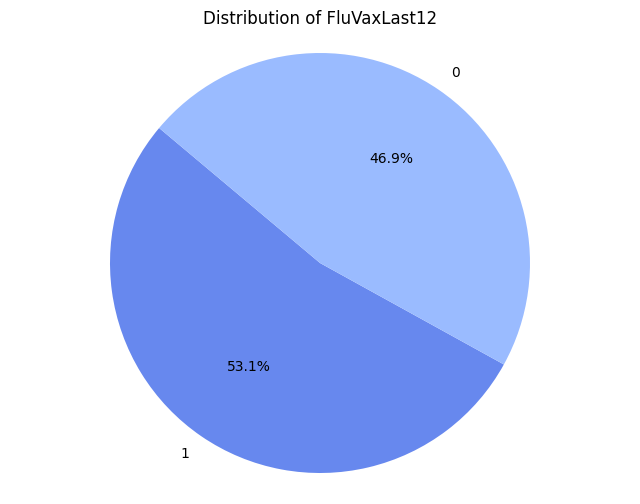

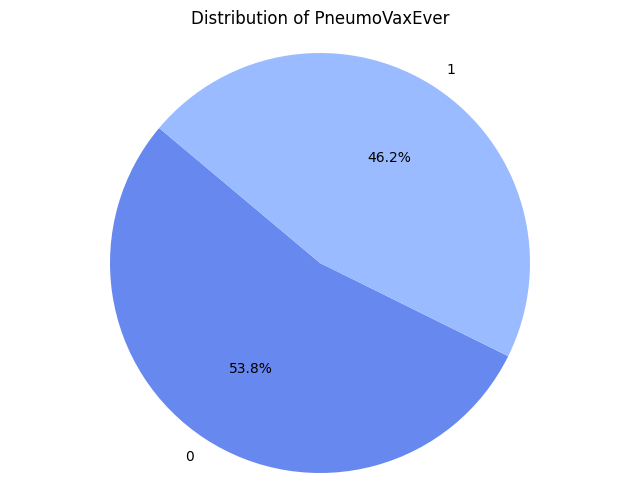

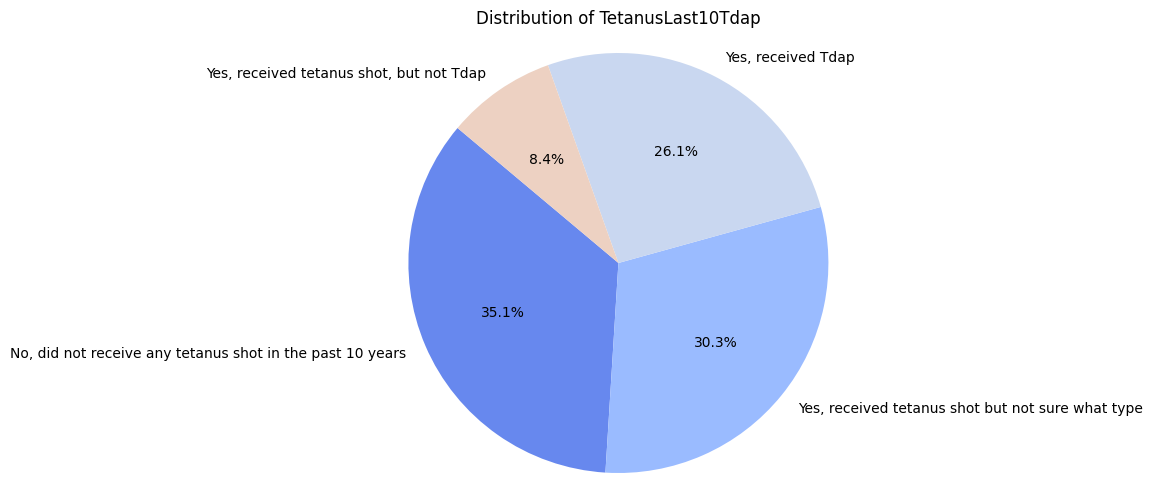

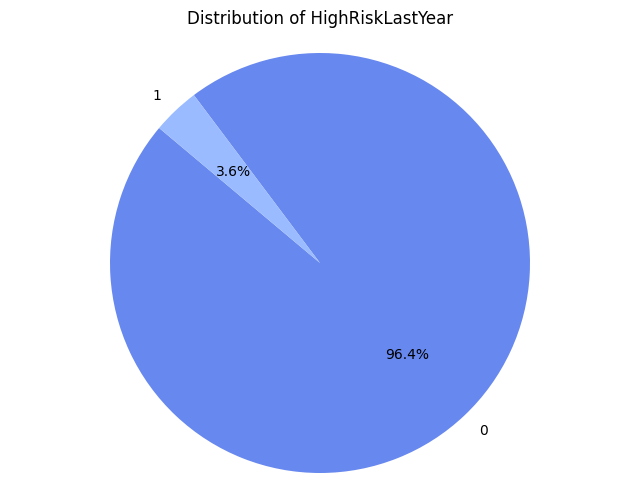

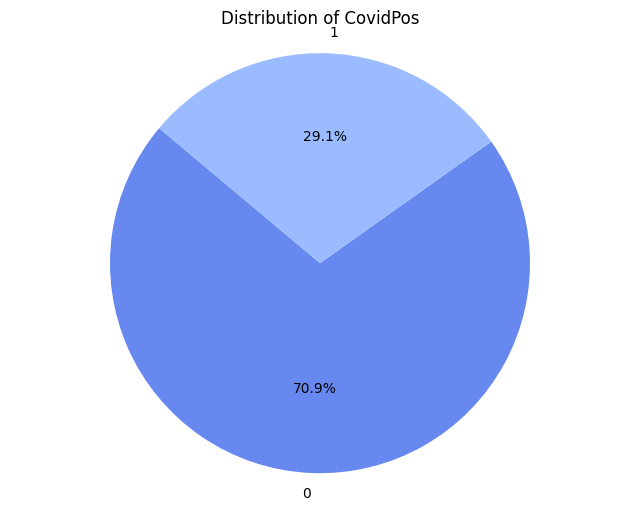

In [26]:
PlotPie(data)

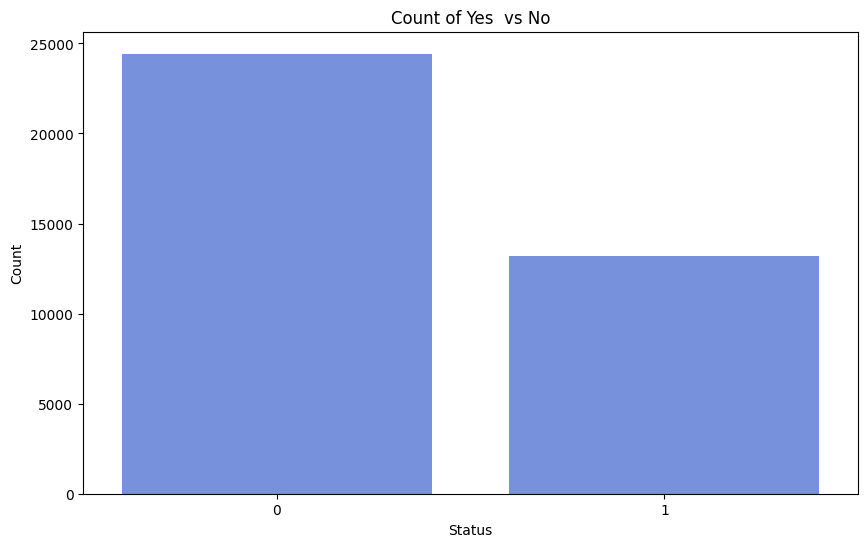

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HadHeartAttack', data=data)
plt.title('Count of Yes  vs No')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [28]:
count_of_ones = data['HadHeartAttack'].value_counts()[1]
print(f"Number of 1s in HadHeartAttack column: {count_of_ones}")

Number of 1s in HadHeartAttack column: 13201


In [29]:
count_of_ones = data['HadHeartAttack'].value_counts()[0]
print(f"Number of 0s in HadHeartAttack column: {count_of_ones}")

Number of 0s in HadHeartAttack column: 24429


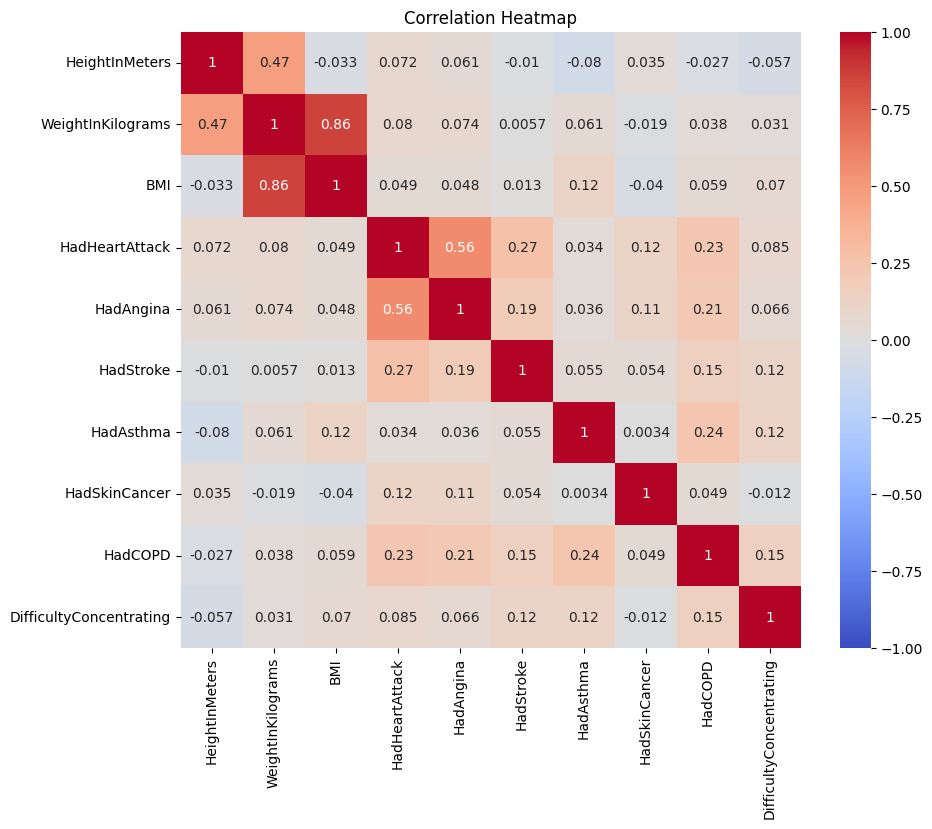

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['HeightInMeters', 'WeightInKilograms', 'BMI','HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'DifficultyConcentrating']].astype(float).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

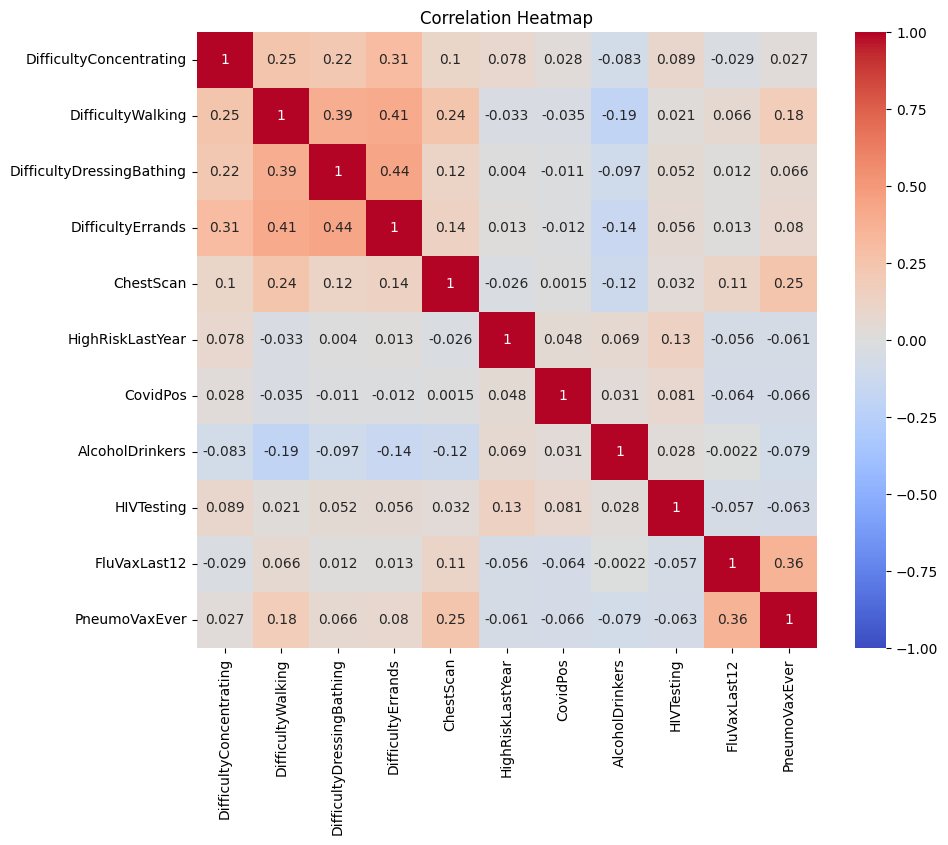

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[[
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands','ChestScan','HighRiskLastYear', 'CovidPos','AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver']].astype(float).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
cols_to_drop = [
    'PatientID', 'State', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear'
]

In [33]:
# Drop irrelevant columns
df_cleaned = data.drop(columns=cols_to_drop)

# Checking remaining columns to confirm
print(df_cleaned.columns)

Index(['Sex', 'GeneralHealth', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'HadHeartAttack', 'HadAngina', 'HadStroke',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'CovidPos'],
      dtype='object')


In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to label encode
categorical_cols = [
    'Sex', 'GeneralHealth', 'AgeCategory', 'SmokerStatus',
    'ECigaretteUsage', 'RaceEthnicityCategory', 'AlcoholDrinkers','HadDiabetes'
]

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Checking the new dataframe
print(df_cleaned.head())

    Sex  GeneralHealth  AgeCategory  HeightInMeters  WeightInKilograms  \
16    1              1           11            1.75          74.839996   
24    1              2           10            1.73          86.180000   
32    1              3            7            1.85          68.040001   
36    1              2            8            1.88         115.669998   
60    0              1           10            1.63          73.480003   

          BMI  HadHeartAttack  HadAngina  HadStroke  HadDepressiveDisorder  \
16  24.370001               1          1          0                      0   
24  28.889999               1          1          0                      0   
32  19.790001               1          0          1                      0   
36  32.740002               1          0          0                      0   
60  27.809999               1          1          0                      0   

    HadKidneyDisease  HadDiabetes  SmokerStatus  ECigaretteUsage  ChestScan  \
16     

In [35]:
df_cleaned.head()

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,CovidPos
16,1,1,11,1.75,74.839996,24.370001,1,1,0,0,0,2,3,0,1,4,0,1
24,1,2,10,1.73,86.180000,28.889999,1,1,0,0,0,2,3,0,1,4,0,1
32,1,3,7,1.85,68.040001,19.790001,1,0,1,0,0,0,0,3,1,4,0,0
36,1,2,8,1.88,115.669998,32.740002,1,0,0,0,0,0,0,3,1,4,0,0
60,0,1,10,1.63,73.480003,27.809999,1,1,0,0,0,2,2,0,1,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of numerical columns to apply StandardScaler
numerical_cols = ['BMI','HeightInMeters', 'WeightInKilograms']  # Add other numerical columns if necessary, e.g., 'HeightInMeters', 'WeightInKilograms'

# Apply StandardScaler to numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [37]:
df_cleaned.head(20)

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,CovidPos
16,1,1,11,0.421773,-0.458542,-0.709818,1,1,0,0,0,2,3,0,1,4,0,1
24,1,2,10,0.235534,0.067952,-0.026330,1,1,0,0,0,2,3,0,1,4,0,1
32,1,3,7,1.352970,-0.774252,-1.402380,1,0,1,0,0,0,0,3,1,4,0,0
36,1,2,8,1.632329,1.437113,0.555845,1,0,0,0,0,0,0,3,1,4,0,0
60,0,1,10,-0.695663,-0.521683,-0.189641,1,1,0,0,0,2,2,0,1,0,0,0
67,1,2,12,0.887371,-0.458542,-0.915470,1,0,0,0,0,0,3,0,0,3,0,0
126,0,3,8,-0.975022,-0.247759,0.292732,1,0,0,1,0,0,2,1,1,4,0,0
128,1,0,7,-0.509424,-0.353150,-0.117058,1,0,0,0,0,0,0,0,0,4,1,0
138,1,4,6,1.166731,2.490100,1.860824,1,1,0,0,1,2,2,0,1,4,1,1
139,1,4,9,0.235534,-0.037439,-0.141253,1,0,0,0,0,0,3,0,1,4,1,0


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Define your target variable and features
X = df_cleaned.drop('HadHeartAttack', axis=1)
y = df_cleaned['HadHeartAttack']

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from collections import Counter
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler

over = SMOTEN(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.6)

X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_resampled, y_train_resampled)
Counter(y_train_resampled)

Counter({0: 17588, 1: 17588})

In [55]:
# Step 2: Train and evaluate SVM
svm_model = SVC(kernel='rbf',gamma=0.01, C=10)  # You can choose 'linear', 'rbf', etc.
svm_model.fit(X_train_resampled, y_train_resampled )
svm_predictions = svm_model.predict(X_test)

In [56]:
# Evaluate SVM
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

SVM Model:
Accuracy: 0.825803879883072
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4878
           1       0.76      0.73      0.75      2648

    accuracy                           0.83      7526
   macro avg       0.81      0.80      0.81      7526
weighted avg       0.82      0.83      0.82      7526

Confusion Matrix:
 [[4280  598]
 [ 713 1935]]


In [57]:
# Step 3: Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [58]:
# Evaluate Logistic Regression
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))


Logistic Regression Model:
Accuracy: 0.8234121711400478
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4878
           1       0.82      0.64      0.72      2648

    accuracy                           0.82      7526
   macro avg       0.82      0.78      0.80      7526
weighted avg       0.82      0.82      0.82      7526

Confusion Matrix:
 [[4498  380]
 [ 949 1699]]


In [59]:
# Step 4: Train and evaluate Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = random_forest_model.predict(X_test)

In [60]:
# Evaluate Random Forest
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Model:
Accuracy: 0.8178315174063248
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4878
           1       0.75      0.72      0.74      2648

    accuracy                           0.82      7526
   macro avg       0.80      0.80      0.80      7526
weighted avg       0.82      0.82      0.82      7526

Confusion Matrix:
 [[4236  642]
 [ 729 1919]]


In [61]:
from xgboost import XGBClassifier
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on training data
xgb_model.fit(X_train_resampled,  y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4878
           1       0.74      0.74      0.74      2648

    accuracy                           0.82      7526
   macro avg       0.80      0.80      0.80      7526
weighted avg       0.82      0.82      0.82      7526

XGBoost Confusion Matrix:
 [[4173  705]
 [ 678 1970]]
